<a href="https://colab.research.google.com/github/pepesrz91/machine-learning-2021-mcc/blob/master/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

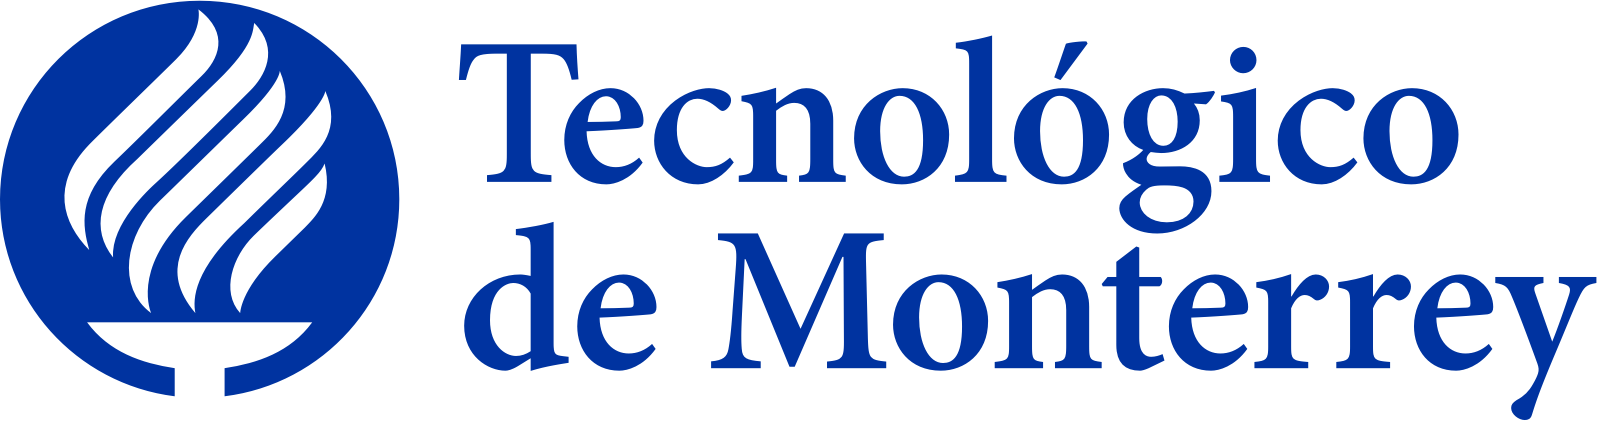

José Juan Suárez Ramos <br>
A01224078 <br>
Tarea 6

# Descripción de datos

En este trabajo el dataset con el cuál llevaremos a cabo el análisis de datos trata sobre el análisis de personas nativas que tienen diabetes en los estados unidos. La finalidad del ejercicio es llevar a cabo 3 modelos diferentes para poder predecir si una persona tiene diabetes o no. 

Se utilizará tres tipos de metodos para llevar a cabo dicho análisis:



1.   Red Neuronal Multicapa
2.   Máquina de soporte de vectores
3.   Regresión Logística. 

Nuestras variables independientes son las siguientes:

1. Pregnancies	
2. Glucose	
3. BloodPressure	
4. SkinThickness	
5. Insulin	
6. BMI	
7. DiabetesPedigreeFunction	
8. Age

Nuestra variables depentiente será la variable de Outcome con los siguientes valores: 



*   Cuando valor sea 0, significa que la persona NO TIENE DIABETES
*   Cuando el valor sea 1, significa que la persona SI TIENE diabetes



In [3]:
 ### Importamos las librerias que estaremos usando
 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier as dtc
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import sklearn.model_selection as model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

from sklearn.metrics import classification_report

encoder = preprocessing.LabelEncoder()

In [19]:

from scipy import stats

from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Presentaciones/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Correlación

Podemos notar que la correlación entre nuestras variables dependientes e independientes tiene una correlación adecuada. No tenemos ninguna variable la cuál nos de la respuesta de la predicción sobre si una persona tiene diabetes o no. 

También no tenemos ninguna variable independiente la cuál tenga una alta correlación con alguna otra. Lo que nos dice que nuestros datos están bien. 

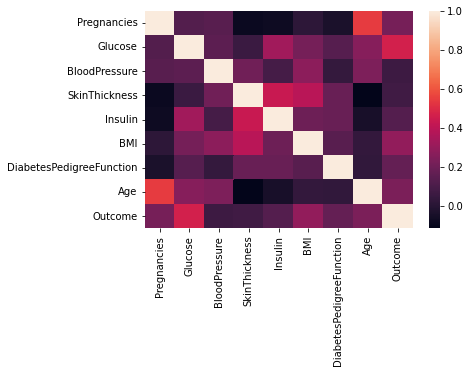

In [5]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [6]:
## Validamos que no tengamos ninguna variable nula
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Aplicacmos una normalización a nuetros datos de entrenamiento X para que de está forma
# tengamos una buena distribución. 

Y = data["Outcome"]
X = data
X.drop("Outcome", inplace=True, axis=1)
X = normalize(X)

In [8]:

trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.5, shuffle=True,  random_state=None)

In [9]:
# Nuestra partición de entrenamiento
print(trainX.shape)
print(testX.shape)

(384, 8)
(384, 8)


## Red Neuronal Multicapa

In [10]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

from keras.layers.core import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot

In [11]:
trainY = to_categorical(trainY, 2)
testY = to_categorical(testY, 2)

scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)
input_dim = trainX.shape[1]
nb_classes = trainY.shape[1]
print(nb_classes)

2


In [12]:

# Creamos nuestras capas ocultas y de calisifación
model = Sequential()
# 8 ya que tenemos 8 atributos independientes. 
model.add(Dense(8, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy", 'mse', 'mae'])


In [14]:
print("Training...")
history = model.fit(trainX, trainY, epochs=1000, batch_size=64, validation_split=0.2, verbose=2, validation_data=(testX, testY))

Training...
Epoch 1/1000
5/5 - 1s - loss: 0.7084 - accuracy: 0.5765 - mse: 0.2586 - mae: 0.4947 - val_loss: 0.6841 - val_accuracy: 0.5714 - val_mse: 0.2428 - val_mae: 0.4861
Epoch 2/1000
5/5 - 0s - loss: 0.7099 - accuracy: 0.5700 - mse: 0.2585 - mae: 0.4936 - val_loss: 0.6782 - val_accuracy: 0.5974 - val_mse: 0.2375 - val_mae: 0.4802
Epoch 3/1000
5/5 - 0s - loss: 0.6978 - accuracy: 0.5700 - mse: 0.2551 - mae: 0.4874 - val_loss: 0.6729 - val_accuracy: 0.6494 - val_mse: 0.2331 - val_mae: 0.4747
Epoch 4/1000
5/5 - 0s - loss: 0.6906 - accuracy: 0.5668 - mse: 0.2464 - mae: 0.4777 - val_loss: 0.6684 - val_accuracy: 0.6753 - val_mse: 0.2296 - val_mae: 0.4698
Epoch 5/1000
5/5 - 0s - loss: 0.6840 - accuracy: 0.5798 - mse: 0.2431 - mae: 0.4747 - val_loss: 0.6646 - val_accuracy: 0.6623 - val_mse: 0.2268 - val_mae: 0.4652
Epoch 6/1000
5/5 - 0s - loss: 0.6757 - accuracy: 0.6287 - mse: 0.2386 - mae: 0.4645 - val_loss: 0.6612 - val_accuracy: 0.6753 - val_mse: 0.2246 - val_mae: 0.4609
Epoch 7/1000
5/5

In [18]:
y_pred = model.predict(testX)

## Resultados Red Neuronal Multicapa

Los resultados de nuestra red neuronal no son malas. Al no haber tantos atributos fuimos capaces de llevar a cabo los ciclos de las épocas de una forma muy rápida por lo cuál pudimos llevar a cabo bastantes. 

Este modelo puede detectar con 76% de precisión que una persona no tiene diabete y con 53% cuando lo tenga. 

In [19]:
print(classification_report(testY, np.round(y_pred), target_names=["0","1"]))


              precision    recall  f1-score   support

           0       0.76      0.73      0.74       250
           1       0.53      0.57      0.55       134

   micro avg       0.67      0.67      0.67       384
   macro avg       0.64      0.65      0.64       384
weighted avg       0.68      0.67      0.67       384
 samples avg       0.67      0.67      0.67       384



## SVM


In [16]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import minmax_scaling


n_estimators = 10

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

In [38]:
data2 = pd.read_csv("/content/drive/MyDrive/Presentaciones/diabetes.csv")

In [39]:
#  Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age	Outcome

data2["Pregnancies"] = minmax_scaling(data2['Pregnancies'].astype(str), columns=[0])
data2["Glucose"] = minmax_scaling(data2["Glucose"].astype(str), columns = [0])
data2["BloodPressure"] = minmax_scaling(data2["BloodPressure"].astype(str), columns = [0])
data2["SkinThickness"] = minmax_scaling(data2["SkinThickness"].astype(str), columns = [0])
data2["Insulin"] = minmax_scaling(data2["Insulin"].astype(str), columns = [0])
data2["BMI"] = minmax_scaling(data2["BMI"].astype(str), columns = [0])
data2["DiabetesPedigreeFunction"] = minmax_scaling(data2["DiabetesPedigreeFunction"].astype(str), columns = [0])
data2["Age"] = minmax_scaling(data2["Age"], columns = [0])


/usr/local/lib/python3.7/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


In [40]:
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [41]:
Y = data2["Outcome"]
X = data2
X.drop("Outcome", inplace=True, axis=1)
# X = normalize(X)

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Y = scaler.fit_transform(Y)

In [42]:
print(X)

     Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
0       0.352941  0.743719  ...                  0.234415  0.483333
1       0.058824  0.427136  ...                  0.116567  0.166667
2       0.470588  0.919598  ...                  0.253629  0.183333
3       0.058824  0.447236  ...                  0.038002  0.000000
4       0.000000  0.688442  ...                  0.943638  0.200000
..           ...       ...  ...                       ...       ...
763     0.588235  0.507538  ...                  0.039710  0.700000
764     0.117647  0.613065  ...                  0.111870  0.100000
765     0.294118  0.608040  ...                  0.071307  0.150000
766     0.058824  0.633166  ...                  0.115713  0.433333
767     0.058824  0.467337  ...                  0.101196  0.033333

[768 rows x 8 columns]


In [43]:
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [44]:
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.5, shuffle=True,  random_state=None)

In [45]:
trainX.shape

(384, 8)

In [46]:
trainY.shape

(384,)

In [47]:
Y = np.array(trainY).reshape(trainY.shape[0],1)
print(trainY)

351    0
736    0
580    1
364    0
612    1
      ..
10     0
445    1
366    1
236    1
467    0
Name: Outcome, Length: 384, dtype: int64


In [48]:
grid.fit(trainX, trainY)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=

In [51]:
pred = np.array(grid.predict(testX))

recall_svm = rs(testY,pred)
precision_svm = ps(testY,pred)

ma_svm = grid.score(testX,testY)

## Resultados SVM 
El resultado de nuestra máquina de vectores supera al de nuestra red neuronal bastante. 

Podemos predecir con un 78% de precisión las personas que no tienen diabetes y junto con nuestro recall y f1-score nos da confianza de que este modelo no tiene biases negativos. 

No es el mismo caso con el valor 1. Podemos predecir con 66% de certeza si una persona tiene diabetes, pero nuestros métricos de recall y f1-score nos arrojan una métrica que nos demuestra que nuestra predicción con este valor puede que no sea tan confiable.

In [52]:
print(classification_report(testY, np.round(pred), target_names=["0","1"]))


              precision    recall  f1-score   support

           0       0.78      0.84      0.81       250
           1       0.66      0.57      0.61       134

    accuracy                           0.75       384
   macro avg       0.72      0.71      0.71       384
weighted avg       0.74      0.75      0.74       384



# Linear Regression Model

In [64]:
import statsmodels.api as sm

In [65]:
data3 = pd.read_csv("/content/drive/MyDrive/Presentaciones/diabetes.csv")

In [66]:
Y = data3["Outcome"]
X = data3
X.drop("Outcome", inplace=True, axis=1)
X = normalize(X)
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size=0.5, shuffle=True,  random_state=None)

In [71]:
xones = sm.add_constant(trainX)
model = sm.Logit(trainY, xones).fit()

Optimization terminated successfully.
         Current function value: 0.592627
         Iterations 6


# Resultados Regresión Lineal 

Nuestro modelo de regresión linear muestra ser el mejor ya que nos arroja un R-cuadrado de 85%. Lo cuál nos indica que podemos entender en un 85% el comportamiento de nuestra variable de salida con respecto a las variables de entrada.

Es importante notar que las variables que más confianza nos dan en nuestros resultados son **INSULIN** y **BLODD_PRESSURE**

In [72]:
print(mimodelo.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.345
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           5.00e-05
Time:                        04:21:24   Log-Likelihood:                -239.07
No. Observations:                 384   AIC:                             496.1
Df Residuals:                     375   BIC:                             531.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0870      0.337      3.229      0.0

## Conclusiones

Creo que los resultados de nuestros modelos SVM y Regresión logística son los mejores y sería lo ideal usarlos en conjunto ya que la máquina de vectores nos puede dar datos muy certeros y confiables si una persona no tiene diabetes. Junto con la regresión logística podemos también tener una buena confianza sobre como podemos llevar a cabo la preddición sobre si un nativo tiene diabétes o no. 

Creo que un punto importante que analizar es si las carácteristicas más importantes que nos arroja la regresión logística tienen resultados parecidos en la predicción no solo de nativos americanos sino en un conjunto más grande de personas con diferentes historiales y herencia cultural, económica, etc. }

